In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
import math
from scipy.stats import mode
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import multivariate_normal

In [3]:
#Import Keras
from tensorflow import keras
# Loading the MNIST dataset

In [4]:
# Loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

8


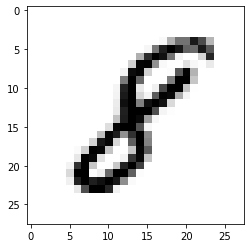

In [6]:
# %matplotlib inline # Only use this if using iPython
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [7]:

print("Number of training examples :", x_train.shape[0], "and each image is of shape (%d, %d)"%(x_train.shape[1], x_train.shape[2]))
print("Number of training examples :", x_test.shape[0], "and each image is of shape (%d, %d)"%(x_test.shape[1], x_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [8]:
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]) 
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [9]:
train_x= X_train / 255
test_x= X_test / 255

In [10]:
Train = np.c_[train_x,y_train]
Test = np.c_[test_x,y_test]
Train.shape, Test.shape

((60000, 785), (10000, 785))

In [12]:
size = 50000
Train_Data, Val_Data = Train[:int(size),:], Train[int(size):,:]

In [13]:
Train_Data.shape, Val_Data.shape

((50000, 785), (10000, 785))

In [14]:
Train_Data.shape

(50000, 785)

In [15]:
Train_Data[:  :,-1].shape

(50000,)

In [16]:
Val_Data[: , :784]
Val_Data[:  :,-1]

array([3., 8., 6., ..., 5., 6., 8.])

In [17]:
X,y = Train_Data[:, 1:size], Train_Data[:,-1]

In [18]:
classes = np.unique(y)
classes

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [19]:
Train_Data[: , :784]
Train_Data[:  :,-1]
Val_Data[: , :784]
Val_Data[:  :,-1]

array([3., 8., 6., ..., 5., 6., 8.])

In [20]:
Test[: , :784]
Test[:  :,-1]

array([7., 2., 1., ..., 4., 5., 6.])

In [21]:
Train_X = Train_Data[: , :784]
Train_X[2].shape

(784,)

In [22]:
classes = np.unique(Train[:,-1])
classes

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [26]:
def GNB_Parameter (Train):
    W = []
    priors = dict()
    means = dict()
#     covs = dict()
#     var_ = dict()
    sigma = dict()
    sigma_ = dict()
    Train_X = Train[: , :784]
    Train_Y = Train[:,-1]
    classes = np.unique(Train_Y)
    condition = classes. astype(int)
    for c in condition:
        X_c = Train_X[Train_Y == c]
        print(X_c.shape)
        priors[c] = X_c.shape[0] / Train_Y.shape[0]
        means[c] = np.mean(X_c, axis=0)
        sigma_[c] = np.cov(X_c.T)
    return priors,means,X_c,sigma_,condition

# 1.b)

In [27]:
prio,mean,c,sigma_,cond = GNB_Parameter(Train_Data)

(4932, 784)
(5678, 784)
(4968, 784)
(5101, 784)
(4859, 784)
(4506, 784)
(4951, 784)
(5175, 784)
(4842, 784)
(4988, 784)


In [25]:
X_test = Test[: , :784]
Y_test = Test[:  :,-1]

In [28]:
def predict(X, Z, Mean, Class):
    res = np.zeros(X.shape[0])
    for i in range(X.shape[0]):
        pred = np.zeros(len(Class))
#         pri = np.zeros(len(Class))
        for j in range(10):
#             pri[j]= prio[j]
            pred[j] = multivariate_normal.logpdf(X[i], Mean[j], Z[j],allow_singular=True)
        res[i] = np.argmax(pred)
    return res

In [ ]:
predic = predict(X_test,sigma_,mean,cond)

In [105]:
predic.shape

(10000,)

In [107]:
target_names = ['class 0', 'class 1','class 2', 'class 3','class 4', 'class 5','class 6', 'class 7','class 8','class 9']
GDA_classification_report=classification_report(Y_test, predic, target_names=target_names)
print(GDA_classification_report)

              precision    recall  f1-score   support

     class 0       0.96      0.89      0.93       980
     class 1       0.98      0.92      0.95      1135
     class 2       0.76      0.95      0.84      1032
     class 3       0.81      0.90      0.85      1010
     class 4       0.87      0.93      0.90       982
     class 5       0.91      0.81      0.86       892
     class 6       0.98      0.89      0.93       958
     class 7       0.92      0.90      0.91      1028
     class 8       0.82      0.84      0.83       974
     class 9       0.95      0.82      0.88      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [28]:
with open("DatasetsDS1/Assignment2_2134563_section2_sub-Question1_sub-sub-question-b_CovarianceMatrix.txt", 'w') as f: 
    for key, value in sigma_.items(): 
        f.write('%s:%s\n' % (key, value))

In [29]:
with open("DatasetsDS1/Assignment2_2134563_section2_sub-Question1_sub-sub-question-b_Prio_class_probability.txt", 'w') as f: 
    for key, value in prio.items(): 
        f.write('%s:%s\n' % (key, value))

In [30]:
with open("DatasetsDS1/Assignment2_2134563_section2_sub-Question1_sub-sub-question-b_mean.txt", 'w') as f: 
    for key, value in mean.items(): 
        f.write('%s:%s\n' % (key, value))

# KNN

In [22]:
Train_X = Train_Data[: , :784]
Train_Y = Train_Data[:  :,-1]
Train_XV = Val_Data[: , :784]
Train_YV = Val_Data[:  :,-1]
Test_X = Test[: , :784]
Test_Y = Test[:  :,-1]

In [29]:
def kNN(x, k, data, label):
    distances =[np.linalg.norm(x-data[i]) for i in range(len(data))]
    idx = np.argpartition(distances, k)
    clas, freq = np.unique(label[idx[:k]], return_counts=True)
    return clas[np.argmax(freq)]

In [31]:
prec = kNN(Test_X, 4,Train_X,Train_Y)

In [33]:
prec

9.0

In [24]:
i=51
print('The predicted value is : ', 
      kNN(Test_X[i], 5, Train_X, Train_Y), 
      ' and the true value is ', 
      Test_Y[i])

The predicted value is :  3.0  and the true value is  3.0


In [25]:
def accuracy_set(data, label, train_data, train_label, k):
    cnt = 0
    for x, lab in zip(data,label):
        if kNN(x,k, train_data, train_label) == lab:
            cnt += 1
    return cnt/len(label)

In [30]:
k_acc = accuracy_set(Test_X, Test_Y, Train_X, Train_Y, 4)
k_acc

0.9658

In [28]:
k_acc = [accuracy_set(Train_XV, Train_YV, Train_X, Train_Y, k) for k in range(1,10)]
k_acc

[0.9712, 0.9667, 0.972, 0.9726, 0.9718, 0.971, 0.9708, 0.9708, 0.9705]

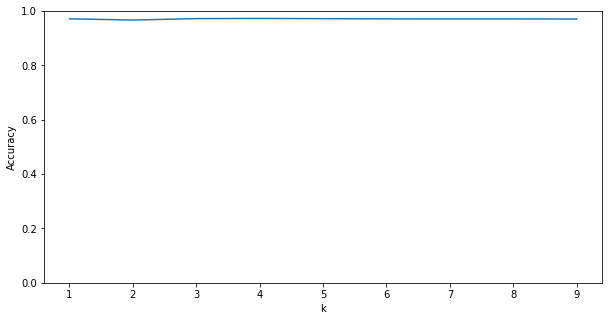

In [29]:
X = [k for k in range(1,10)]
plt.figure(figsize = (10,5))
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.plot(X,k_acc)

In [26]:
k_acc = accuracy_set(Test_X, Test_Y, Train_X, Train_Y, 4)
k_acc

0.9658

In [27]:
k_acc = accuracy_set(Test_X, Test_Y, Train_X, Train_Y, 3)
k_acc

0.9681

In [ ]:
k_acc = accuracy_set(Test_X, Test_Y, Train_X, Train_Y, 3)
k_acc